In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime, time, timedelta

# para desplegar las graficas aqui en el notebook
%matplotlib inline 

### Outliers

In [2]:
import pandas as pd
samples_nans = pd.read_csv('../data/samples_nans.csv')
samples_nans = samples_nans[~samples_nans['time_travel'].isna()].reset_index(drop=True)
# samples_nans

In [3]:
# Por link
bigotes = []
for link, df in samples_nans.groupby('id_link'):
    q1 = df['time_travel'].quantile(0.25)
    q3 = df['time_travel'].quantile(0.75)
    b_sup = bigote_superior = q3 + 1.5 * (q3 - q1)
    bigotes.append(b_sup)   
    # print(f"Link: {link} \tMax: {df['time_travel'].max()}\tMean: {round(df['time_travel'].mean(),0)}\tSuperio: {b_sup}")

print(max(bigotes))

427.5


##### Dataset en general

In [4]:
# maximo, minimo, mean, promedio 'travel_time'
travel_time = {
    'max': samples_nans['time_travel'].max(),
    'min': samples_nans['time_travel'].min(),
    'mean':round(samples_nans['time_travel'].mean(), 2),
    'std': round(samples_nans['time_travel'].std(), 2),
    'median': samples_nans['time_travel'].median()}

msm = f"max: {travel_time['max']}, min: {travel_time['min']}, mean: {travel_time['mean']}, std: {travel_time['std']}, mediana: {travel_time['median']}"
print(msm)


max: 9288.0, min: 10.0, mean: 58.77, std: 58.14, mediana: 46.0


-14


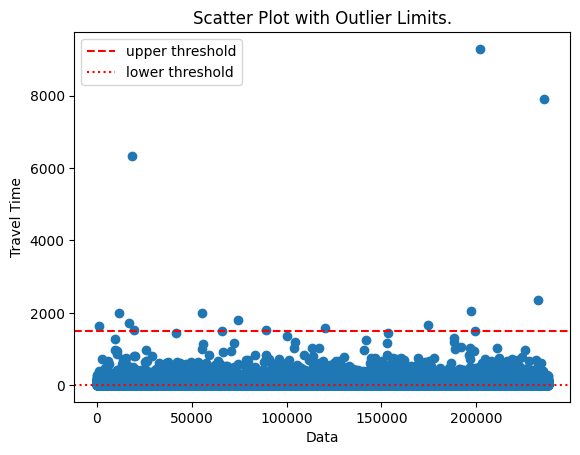

In [5]:
# diagrama de dispersion de la columna 'time_travel'
datos = samples_nans['time_travel']
#2000#427.5#800#1500#900
umbral_superior = 1500
umbral_inferior = 10

print(samples_nans[samples_nans['time_travel']<=umbral_superior].shape[0]-samples_nans.shape[0])

# Graficar de el histograma con outliers
plt.scatter(range(len(datos)), datos)
plt.axhline(umbral_superior, color='r', linestyle='--', label='upper threshold')
plt.axhline(umbral_inferior, color='r', linestyle='dotted', label='lower threshold')
plt.xlabel('Data')
plt.ylabel('Travel Time')
plt.title('Scatter Plot with Outlier Limits.')
plt.legend()
plt.show()
plt.show()
#plt.savefig('plotOutliersLimit.eps', format='eps', dpi=1000)

-14


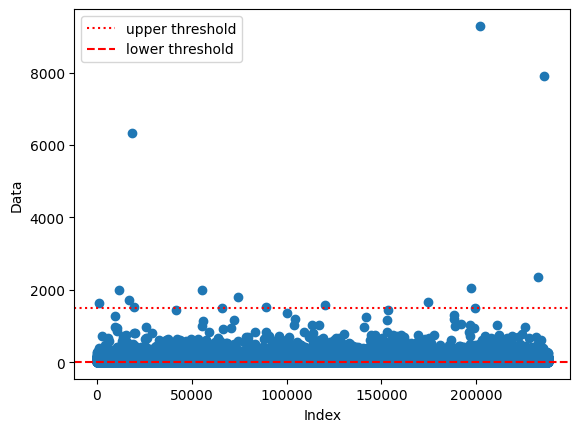

In [38]:
import matplotlib.pyplot as plt

# diagrama de dispersion de la columna 'time_travel'
datos = samples_nans['time_travel']
#2000#427.5#800#1500#900
umbral_superior = 1500
umbral_inferior = 10

print(samples_nans[samples_nans['time_travel'] <= umbral_superior].shape[0] - samples_nans.shape[0])

# Graficar de el histograma con outliers
plt.scatter(range(len(datos)), datos)
plt.axhline(umbral_superior, color='r', linestyle='dotted', label='upper threshold')
plt.axhline(umbral_inferior, color='r', linestyle='--', label='lower threshold')
plt.xlabel('Index')
plt.ylabel('Data')
#plt.title('Scatter plot with outlier limits.')
plt.legend()

# Guardar el plot en formato EPS
#plt.savefig('scatter_plot_outliers.eps', format='eps', dpi=300)
plt.savefig('scatter_plot_outliers.png', dpi=300)
plt.show()

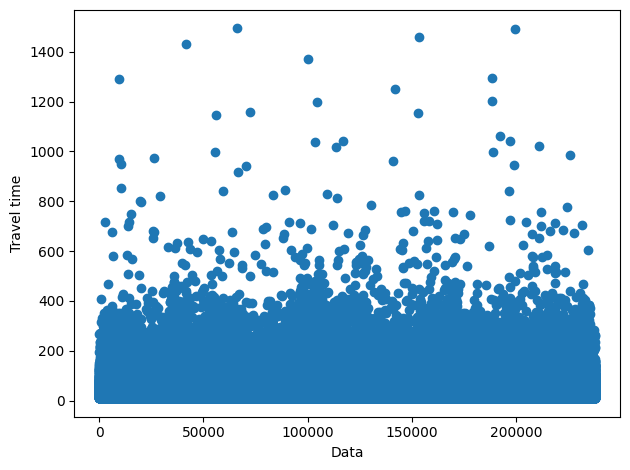

In [22]:
# eliminar outlier
samples_nans_tmp = samples_nans[samples_nans['time_travel'] <= umbral_superior]

# diagrama de dispersion de la columna 'time_travel'
datos_filtrados = samples_nans_tmp['time_travel']

# Graficar la primera gráfica en el primer subplot
plt.scatter(range(len(datos_filtrados)), datos_filtrados)
plt.xlabel('Data')
plt.ylabel('Travel time')
#plt.title('Scatter plot without outlier')

# Ajustar los subplots y mostrar la figura
plt.tight_layout()
plt.show()

In [23]:
samples_nans_tmp['time_travel'].mean(), samples_nans_tmp['time_travel'].std()

(58.595853288314615, 49.552464742398804)

In [24]:
for link, df in samples_nans_tmp.groupby('id_link'):
    print(f"Link: {link} \tMax: {df['time_travel'].max()}\tMean: {round(df['time_travel'].mean(),0)}\t")

Link: 0 	Max: 1493.0	Mean: 178.0	
Link: 1 	Max: 1295.0	Mean: 92.0	
Link: 2 	Max: 1042.0	Mean: 114.0	
Link: 3 	Max: 106.0	Mean: 46.0	
Link: 4 	Max: 822.0	Mean: 67.0	
Link: 5 	Max: 128.0	Mean: 41.0	
Link: 6 	Max: 252.0	Mean: 35.0	
Link: 7 	Max: 143.0	Mean: 29.0	
Link: 8 	Max: 267.0	Mean: 21.0	
Link: 9 	Max: 151.0	Mean: 36.0	
Link: 10 	Max: 153.0	Mean: 24.0	
Link: 11 	Max: 351.0	Mean: 74.0	
Link: 12 	Max: 471.0	Mean: 121.0	
Link: 13 	Max: 479.0	Mean: 159.0	
Link: 14 	Max: 365.0	Mean: 48.0	
Link: 15 	Max: 90.0	Mean: 35.0	
Link: 16 	Max: 116.0	Mean: 39.0	
Link: 17 	Max: 109.0	Mean: 39.0	
Link: 18 	Max: 116.0	Mean: 33.0	
Link: 19 	Max: 224.0	Mean: 37.0	
Link: 20 	Max: 80.0	Mean: 28.0	
Link: 21 	Max: 115.0	Mean: 44.0	
Link: 22 	Max: 238.0	Mean: 46.0	
Link: 23 	Max: 134.0	Mean: 35.0	
Link: 24 	Max: 259.0	Mean: 35.0	
Link: 25 	Max: 514.0	Mean: 51.0	
Link: 26 	Max: 206.0	Mean: 51.0	
Link: 27 	Max: 170.0	Mean: 35.0	
Link: 28 	Max: 114.0	Mean: 38.0	
Link: 29 	Max: 93.0	Mean: 28.0	
Link: 30 	Max: 1

### Histograma respecto a tiempo

In [25]:
travel_time_series = pd.read_csv('../data/travel_time_series.csv')
travel_time_series

,id_sample,id_linkref,init_stop,init_name,end_stop,end_name,link,date_time_init,date_time_end,travel_time,init_idp,end_idp,veh,lap,date,time,hour,rg15min,horas,minute
0,0,0,100,inicio,101,primer stop,100:101,2023-03-01 07:24:21,2023-03-01 07:27:33,192.0,NaN,NaN,NaN,NaN,NaN,07:00:00,07:27:33,07:30:00,7,30
1,0,1,101,primer stop,102,segundo stop,101:102,2023-03-01 07:27:33,2023-03-01 07:29:19,106.0,13190622.0,13190922.0,SJ01,1.0,2023-03-01,07:00:00,07:29:19,07:30:00,7,30
2,0,2,102,segundo stop,103,Ccollana,102:103,2023-03-01 07:29:19,2023-03-01 07:30:49,90.0,13190922.0,13191197.0,SJ01,1.0,2023-03-01,07:00:00,07:30:49,07:30:00,7,30
3,0,3,103,Ccollana,104,Puente Huaccoto,103:104,2023-03-01 07:30:49,2023-03-01 07:31:13,24.0,13191197.0,13191276.0,SJ01,1.0,2023-03-01,07:00:00,07:31:13,07:30:00,7,30
4,0,4,104,Puente Huaccoto,105,Kayra,104:105,2023-03-01 07:31:13,2023-03-01 07:32:29,76.0,13191276.0,13191535.0,SJ01,1.0,2023-03-01,07:00:00,07:32:29,07:30:00,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248331,3360,78,178,Primero,179,Segundo,178:179,2023-03-25 11:08:40,2023-03-25 11:08:52,12.0,17265203.0,17265239.0,SJ42,2.0,2023-03-25,11:00:00,11:08:52,11:15:00,11,15
248332,3360,79,179,Segundo,180,Reservorio,179:180,2023-03-25 11:08:52,2023-03-25 11:09:16,24.0,17265239.0,17265310.0,SJ42,2.0,2023-03-25,11:00:00,11:09:16,11:15:00,11,15
248333,3360,80,180,Reservorio,181,Cuarto,180:181,2023-03-25 11:09:16,2023-03-25 11:09:28,12.0,17265310.0,17265340.0,SJ42,2.0,2023-03-25,11:00:00,11:09:28,11:15:00,11,15
248334,3360,81,181,Cuarto,182,Quinto,181:182,2023-03-25 11:09:28,2023-03-25 11:09:43,15.0,NaN,NaN,NaN,NaN,NaN,11:00:00,11:09:43,11:15:00,11,15


In [26]:
len(travel_time_series['id_sample'].unique())

2992

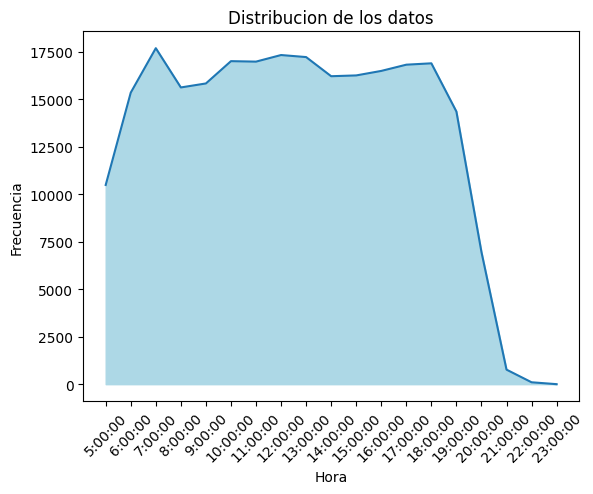

In [27]:
import matplotlib.pyplot as plt

# Datos de ejemplo
datos = travel_time_series.groupby('horas').count()['link'].to_dict()

# Ordenar los datos por hora de menos a mayor
datos_ordenados = sorted(datos.items(), key=lambda x: x[0])

# Extraer las horas y frecuencias ordenadas
horas = [f"{str(item[0])}:00:00" for item in datos_ordenados]
frecuencia = [item[1] for item in datos_ordenados]

# Crear la gráfica continua
plt.plot(horas, frecuencia)
plt.fill_between(horas, frecuencia, color='lightblue')

# Configurar etiquetas y título
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los datos')
plt.xticks(rotation=45)

# Mostrar la gráfica 
plt.show()

### Promedio de travel time

C:\Users\efran\AppData\Local\Temp\ipykernel_38980\595619208.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(horas, rotation=45)


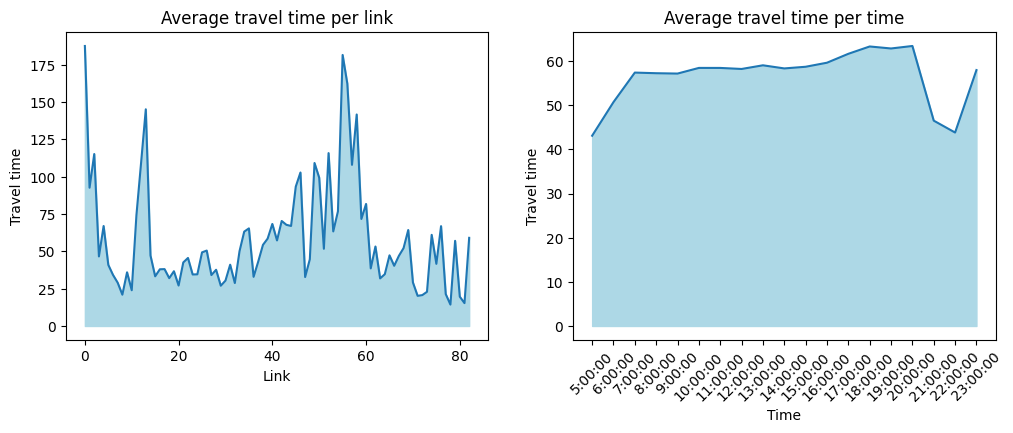

In [28]:
import numpy as np
means_dict = travel_time_series.groupby('id_linkref', observed=False).agg({'travel_time':[np.mean]})[('travel_time', 'mean')].to_dict()
ttmean_hora = travel_time_series.groupby('horas', observed=False).agg({'travel_time':[np.mean]})[('travel_time', 'mean')].to_dict()

links = means_dict.keys()
tt1 = means_dict.values()
horas = [f"{str(item)}:00:00" for item in ttmean_hora.keys()]
tt2 = [item for item in ttmean_hora.values()]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Crear la gráfica continua
ax[0].plot(links, tt1)
ax[0].set_xlabel ('Link')
ax[0].set_ylabel('Travel time')
ax[0].set_title('Average travel time per link')
ax[0].fill_between(links, tt1, color='lightblue')

ax[1].plot(horas, tt2)
ax[1].fill_between(horas, tt2, color='lightblue')
ax[1].set_xlabel ('Time')
ax[1].set_ylabel('Travel time')
ax[1].set_title('Average travel time per time')
ax[1].set_xticklabels(horas, rotation=45)

# Mostrar la gráfica 
plt.show()

In [29]:
travel_time_series.groupby('horas', observed=False).agg({'travel_time':[np.mean]})[('travel_time', 'mean')]

horas
5     43.118337
6     50.741774
7     57.427093
8     57.283355
9     57.204043
10    58.485474
11    58.482007
12    58.247258
13    59.078402
14    58.370366
15    58.748539
16    59.664948
17    61.682483
18    63.344819
19    62.890321
20    63.456806
21    46.536554
22    43.840000
23    58.000000
Name: (travel_time, mean), dtype: float64

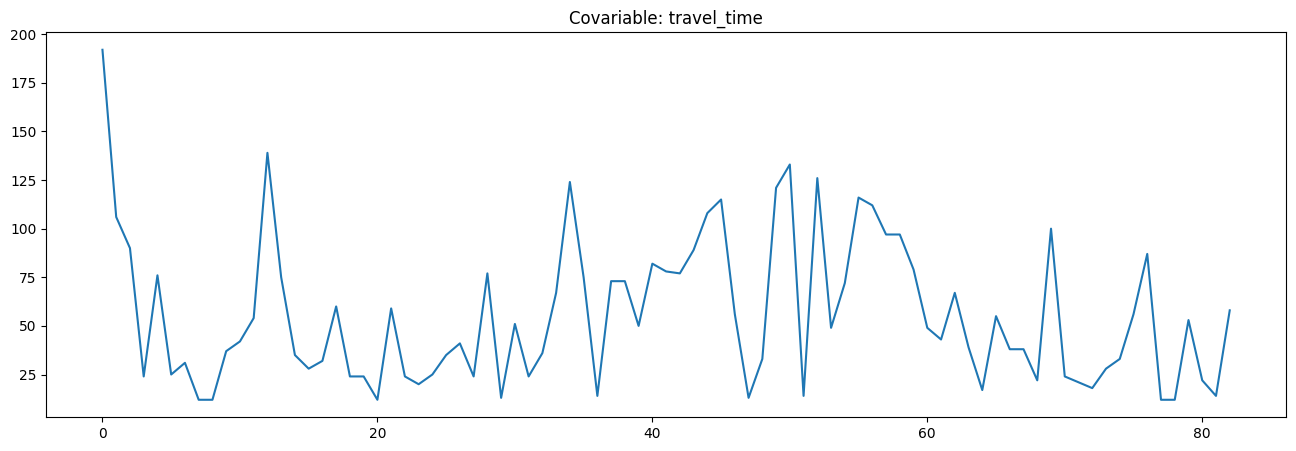

In [31]:

# Dibujar los sets de entrenamiento/validación/prueba para la covariable
fig, ax = plt.subplots(figsize = (16,5))
for i in range(1):#3360
    #j = numero_aleatorio = np.random.randint(0, 3360)
    #print(j)
    tmp = travel_time_series[travel_time_series['id_sample'] == i]
    plt.plot(tmp['travel_time'])
plt.title(f'Covariable: {"travel_time"}')
plt.show()

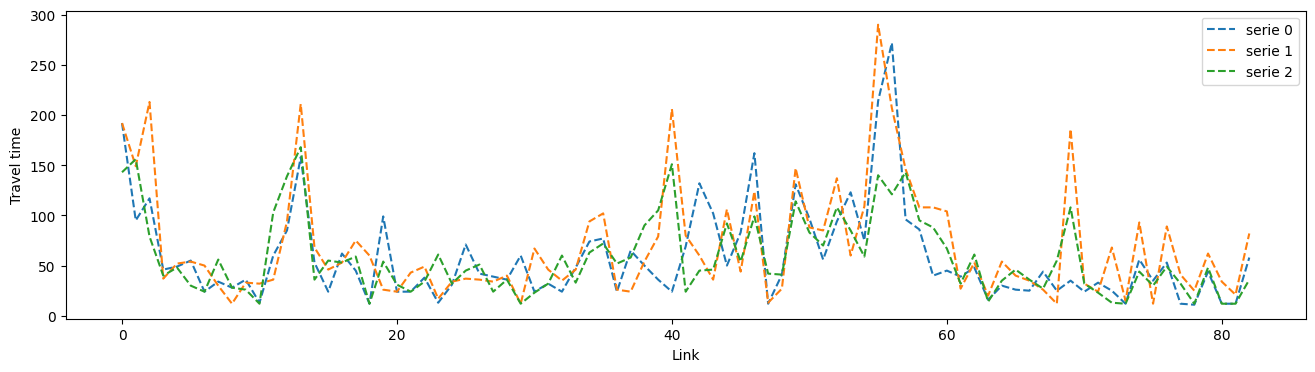

In [33]:
n = 3359 # los buenos (1925, 2730, 3)
a, b, c = 1925, 2730, 3 #np.random.randint(0, n), np.random.randint(0, n), np.random.randint(0, n)
dftmp = travel_time_series[(travel_time_series['id_sample'] == a) | (travel_time_series['id_sample'] == b) | (travel_time_series['id_sample'] == c)]
#dftmp = travel_time_series[travel_time_series['id_sample']< 3]
fig, ax = plt.subplots(figsize = (16,4))
color = ['#1f77b4', '#ff7f0e', '#2ca02c']
c = 0
for link,df in dftmp.groupby('id_sample'):  
    plt.plot(df['travel_time'].reset_index(drop=True), label=f"serie {c}", linestyle='--', color=color[c])
    plt.xlabel('Link')
    plt.ylabel('Travel time')
    plt.legend()
    c+=1
#plt.title('Travel time series')
plt.show()

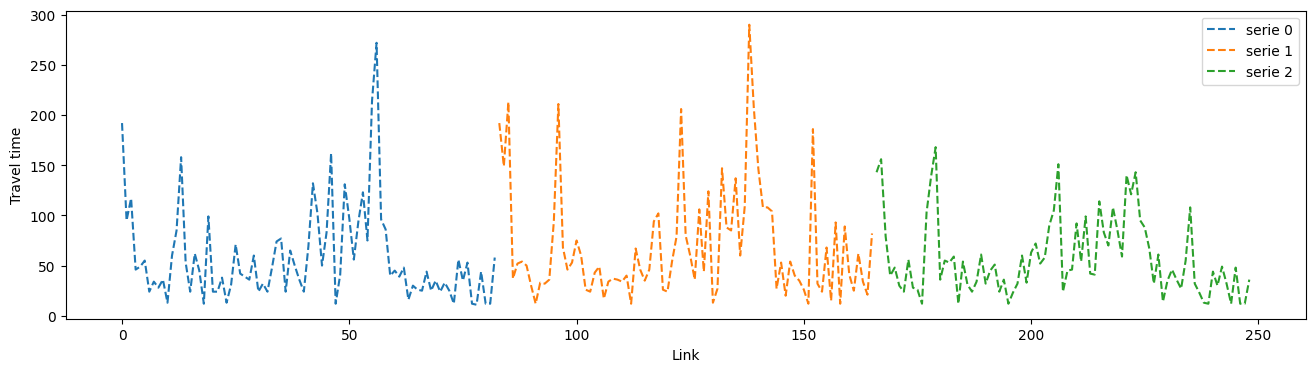

In [35]:
n = 3359 # los buenos (1925, 2730, 3)
a, b, c = 1925, 2730, 3 #np.random.randint(0, n), np.random.randint(0, n), np.random.randint(0, n)
dftmp = travel_time_series[(travel_time_series['id_sample'] == a) | (travel_time_series['id_sample'] == b) | (travel_time_series['id_sample'] == c)]
#dftmp = travel_time_series[travel_time_series['id_sample']< 3]
dftmp = dftmp.reset_index()
fig, ax = plt.subplots(figsize = (16,4))
color = ['#1f77b4', '#ff7f0e', '#2ca02c']
c = 0
for link,df in dftmp.groupby('id_sample'):  
    plt.plot(df['travel_time'], label=f"serie {c}",  linestyle='--', color=color[c])
    plt.xlabel('Link')
    plt.ylabel('Travel time')
    plt.legend()
    c+=1
#plt.title('Concatenated travel time series')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


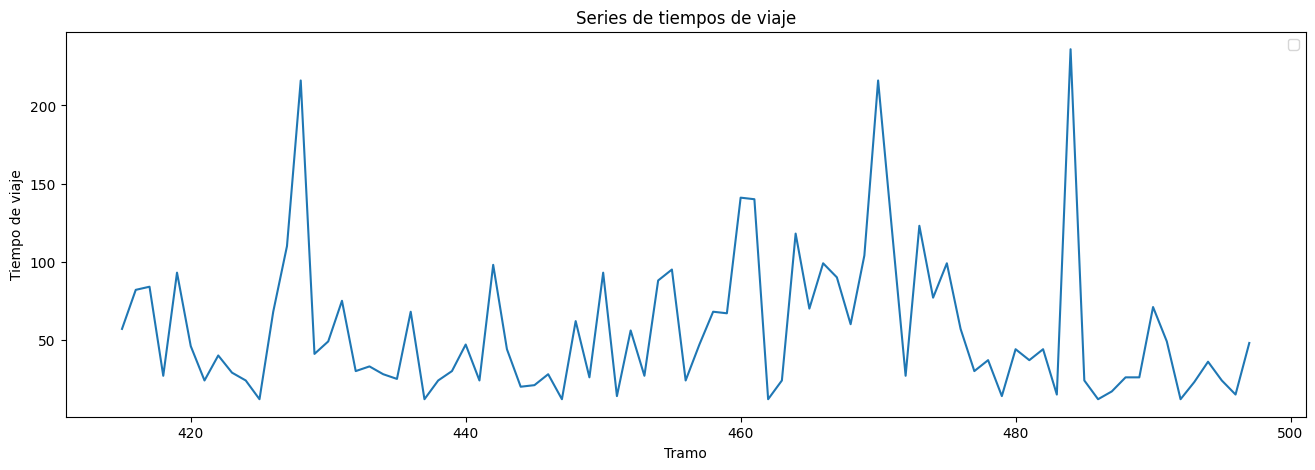

In [23]:
#n = 3359 # los buenos (1925, 2730, 3)
#a, b, c = 1925, 2730, 3 #np.random.randint(0, n), np.random.randint(0, n), np.random.randint(0, n)
dftmp = travel_time_series[(travel_time_series['id_sample'] == 5)]# | (travel_time_series['id_sample'] == b) | (travel_time_series['id_sample'] == c)]
fig, ax = plt.subplots(figsize = (16,5))
color = ['#1f77b4', '#ff7f0e', '#2ca02c']
c = 0
for link,df in dftmp.groupby('id_sample'):  
    plt.plot(df['travel_time'])
    plt.xlabel('Tramo')
    plt.ylabel('Tiempo de viaje')
    plt.legend()
    c+=1
plt.title('Series de tiempos de viaje')
plt.show()